<a href="https://colab.research.google.com/github/kouib123/Creating-an-Incremental-Loading-Versus-Flush-and-Fill-on-SQL-Server-For-ETL-Processing/blob/master/AverageMonthSpent_Bike_Regression_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Code Snippet 0: Install AI Based ML
!pip install -U --pre pycaret


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# EXPLORATORY DATA ANALYSIS 

In [2]:
# Code Snippet 1: Importing Basic Data science package
import numpy as np
import pandas as pd

In [3]:
# Code Snippet 3: using pandas to read the file
df = pd.read_csv('/content/Trivaley Bike Store.csv')

In [4]:
# Code Snippet 4: displaying the data size
df.shape

(16519, 26)

In [5]:
# Code Snippet 5: displaying the columns names:
df.columns

Index(['CustomerID', 'AveMonthSpend', 'BikeBuyer', 'Title', 'FirstName',
       'MiddleName', 'LastName', 'Suffix', 'AddressLine1', 'AddressLine2',
       'City', 'StateProvinceName', 'CountryRegionName', 'PostalCode',
       'PhoneNumber', 'BirthDate', 'Age', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome'],
      dtype='object')

In [6]:
# Code Snippet 6: displaying the data
df

,CustomerID,AveMonthSpend,BikeBuyer,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,...,Age,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,89,0,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,...,56,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,117,1,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,...,57,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,123,0,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,...,57,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,50,0,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,...,54,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,95,1,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,...,54,Bachelors,Professional,F,S,1,4,5,5,92771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16514,13121,101,0,NaN,Latasha,E,Jimenez,NaN,7259 Birchwood,NaN,...,57,Bachelors,Professional,F,M,1,4,5,5,101542
16515,26100,46,0,NaN,James,Garner,Ptaszynski,NaN,7345 Kenwal Rd.,NaN,...,86,Partial College,Professional,F,S,1,2,0,3,46549
16516,11328,79,0,NaN,Julian,M,Griffin,NaN,7398 Withersed Lane,NaN,...,82,Bachelors,Management,M,M,1,2,0,5,133053
16517,23077,65,0,NaN,Marvin,A,Hernandez,NaN,1019 Book Road,NaN,...,76,High School,Skilled Manual,M,M,1,2,0,4,31930


In [7]:
# Code Snippet 6.1: listing the data datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            16519 non-null  int64 
 1   AveMonthSpend         16519 non-null  int64 
 2   BikeBuyer             16519 non-null  int64 
 3   Title                 88 non-null     object
 4   FirstName             16519 non-null  object
 5   MiddleName            9534 non-null   object
 6   LastName              16519 non-null  object
 7   Suffix                2 non-null      object
 8   AddressLine1          16519 non-null  object
 9   AddressLine2          276 non-null    object
 10  City                  16519 non-null  object
 11  StateProvinceName     16519 non-null  object
 12  CountryRegionName     16519 non-null  object
 13  PostalCode            16519 non-null  object
 14  PhoneNumber           16519 non-null  object
 15  BirthDate             16519 non-null

In [8]:
# Code Snippet 7: Listing the statistical summary of the variables
df.describe()

,CustomerID,AveMonthSpend,BikeBuyer,Age,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000
mean,20234.225195,72.405957,0.332284,60.413161,0.673891,1.500999,0.992009,2.006235,78122.511532
std,5342.515987,27.285370,0.471046,11.252120,0.468802,1.138962,1.515048,1.682736,39710.985718
min,11000.000000,22.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,9482.000000
25%,15604.500000,52.000000,0.000000,52.000000,0.000000,1.000000,0.000000,0.000000,47807.500000
50%,20221.000000,68.000000,0.000000,59.000000,1.000000,2.000000,0.000000,2.000000,76120.000000
75%,24860.500000,84.000000,1.000000,68.000000,1.000000,2.000000,2.000000,3.000000,105194.500000
max,29482.000000,176.000000,1.000000,112.000000,1.000000,4.000000,5.000000,5.000000,196511.000000


In [9]:
# Code Snippet 8:
# Installing the missingno package
!pip install missingno 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
# Code Snippet 8.1: Importing the missingno package
import missingno as msno

<AxesSubplot:>

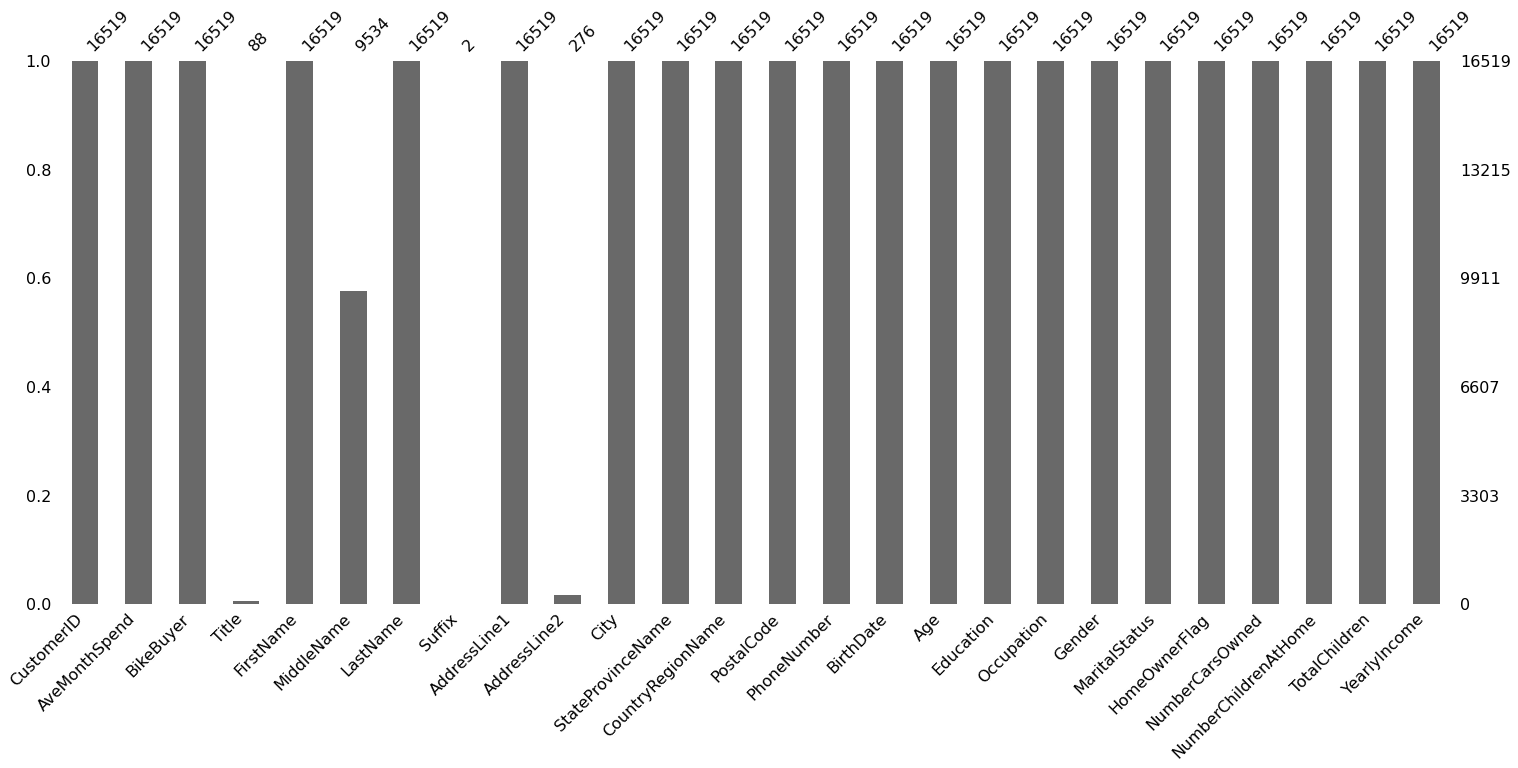

In [11]:
# Code snippet 9
# Generating the missing data report
msno.bar(df)

In [12]:
# Code Snippet 9.1
#Setting PostalCode as categorical(non-numeric/string)
df['PostalCode'] = df['PostalCode'].astype('str')

In [13]:
# Code snippet 10
# Selecting the predictor and the target variables
predictors =['AveMonthSpend', 'BikeBuyer', 'City', 'StateProvinceName', 'CountryRegionName', 'PostalCode',
       'Age', 'Education', 'Gender','MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome']

In [14]:
# Code snippet 11
# Creating a dataframe with only predictors and the target variable
pred_data = df[predictors]
# Displaying the columns names:
pred_data.columns

Index(['AveMonthSpend', 'BikeBuyer', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'Age', 'Education', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome'],
      dtype='object')

In [15]:
# Code snippet 12
# Displaying the data size of the predictors dataset
pred_data.shape

(16519, 15)

In [16]:
# Code snippet 13
# Installing the Auto EDA package
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 5.3 MB/s 


In [17]:
# Code snippet 14
# Importing the package 
import sweetviz as sv

In [18]:
# Code snippet 15
# Generating the report using sweetviz package
sv_report  = sv.analyze(pred_data)

                                             |          | [  0%]   00:00 -> (? left)

In [19]:
# Code snippet 16
# Generating a html report from sv_report
sv_report.show_html("Trivaley Bike Store EDA report.html")

Report Trivaley Bike Store EDA report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Model Building 

In [21]:
# Code snippet 16.1
cols =['AveMonthSpend', 'BikeBuyer', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'Age', 'Education', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome']
df1= pred_data[cols]
df1.columns

Index(['AveMonthSpend', 'BikeBuyer', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'Age', 'Education', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome'],
      dtype='object')

In [22]:
# Code snippet 17
# Importing all Regression ML libraries
from pycaret.regression import *

In [24]:
# Code snippet 18
# Setting all categorical features to one variable:
# Code snippet 11
cat_cols = ['City','StateProvinceName','CountryRegionName','PostalCode','Education','Gender','MaritalStatus']

In [25]:
# Code snippet 19
# Setting all numerical features to one variable:
num_cols = ['Age','HomeOwnerFlag','NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren','YearlyIncome']

In [26]:
# Code snippet 20
# Setting up the regression model using Pycaret - passing the categorical and numerical variables:
regression_model_setup = setup(df1, target = 'AveMonthSpend', categorical_features= cat_cols, numeric_features= num_cols)

,Description,Value
0,Session id,7901
1,Target,AveMonthSpend
2,Target type,Regression
3,Data shape,"(16519, 19)"
4,Train data shape,"(11563, 19)"
5,Test data shape,"(4956, 19)"
6,Ordinal features,2
7,Numeric features,6
8,Categorical features,7
9,Preprocess,True


In [27]:
# Code snippet 21
# Running the Pycaret AutoML process with a time-out parameter
compare_models(budget_time = 300)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.6064,10.7541,3.2791,0.9856,0.0519,0.0403,2.2150
et,Extra Trees Regressor,2.8984,13.3846,3.6579,0.9821,0.0579,0.0450,3.8410
lightgbm,Light Gradient Boosting Machine,3.1858,15.7866,3.9728,0.9789,0.0649,0.0509,0.8760
ada,AdaBoost Regressor,4.8945,37.7162,6.1397,0.9496,0.0927,0.0756,1.7120
rf,Random Forest Regressor,4.9960,39.9163,6.3163,0.9467,0.1041,0.0827,4.9430
lr,Linear Regression,4.8713,40.5017,6.3627,0.9460,0.0898,0.0703,2.9430
ridge,Ridge Regression,4.8706,40.5016,6.3627,0.9460,0.0898,0.0703,0.6410
lar,Least Angle Regression,4.8713,40.5017,6.3627,0.9460,0.0898,0.0703,0.6420
br,Bayesian Ridge,4.8708,40.5016,6.3627,0.9460,0.0898,0.0703,0.6580
lasso,Lasso Regression,5.1598,50.0771,7.0741,0.9332,0.0861,0.0699,0.7880


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

GradientBoostingRegressor(random_state=7901)

In [28]:
# Code Snippet 21.1
# Creating a ML model using the best algorithm:
model= create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.5682,10.1913,3.1924,0.9851,0.0522,0.0398
1,2.6227,10.6642,3.2656,0.9858,0.0524,0.0410
2,2.6004,10.7102,3.2726,0.9865,0.0492,0.0387
3,2.6210,10.7729,3.2822,0.9857,0.0521,0.0408
4,2.5845,10.7797,3.2832,0.9850,0.0533,0.0411
5,2.6139,10.9668,3.3116,0.9864,0.0521,0.0400
6,2.6351,11.1670,3.3417,0.9848,0.0527,0.0406
7,2.6194,10.7474,3.2783,0.9859,0.0525,0.0409
8,2.6391,10.8781,3.2982,0.9848,0.0515,0.0409


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [29]:
# Code snippet 22
# Predicting the AveMonthSpend using the best ML model:
predictions = predict_model(model, data=pred_data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.4064,9.1462,3.0243,0.9877,0.0475,0.0370


In [30]:
# Code snippet 23
# Converting the predictions to a csv file to send it to client:
predictions.to_csv("Average Monthly Bike Score Predictions.csv")